## Regular subdivisons

*Regular subdivsions* of point sets appear in several different applications. `polymake` allows to define regular subdivisions of point configurations (e.g. the lattice points of a lattice polytope) via weights on the points. The weights define a *height function* on the points, and the subdivision is described by the lower hull of the polytope defined by the lifted points (see [here](http://link.springer.com/book/10.1007%2F978-3-642-12971-1) for example to get an idea of the mathematical backround). Let us look at an example on how to create a regular subdivision.

    


In [1]:
$M = new Matrix<Rational>([[1,0,0],[1,2,0],[1,1,1],[1,0,2],[1,2,2],[1,1,3]]);
$w = new Vector<Rational>([0,0,1,0,0,3]);
$S = new fan::SubdivisionOfPoints(POINTS=>$M,WEIGHTS=>$w);
print $S->MAXIMAL_CELLS;

{3 4 5}
{0 1 3 4}


Click here for additional output 
 
polymake: used package cdd
 cddlib
 Implementation of the double description method of Motzkin et al.
 Copyright by Komei Fukuda.
 http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/

    
    {0 1 3 4}
    {3 4 5}


The six points (given by the six rows of the matrix `M`) define a pentagon with interior point `(1,1)`. The weights `w` must be given in the same order as the vertices. So in our case the interior point has weight `1`. Switching to the `fan` application we may create the regular subdivision via the polymake object `SubdivisionOfPoints`, whose input parameters are the points `M` and weights `w`. A maximal cell of the subdivision is given by a set of indices, representing the points that cell contains. In our example we got two maximal cells and the first one is a quadrilateral with vertices 0, 1, 3 and 4.

We may visualize the regular subdivision if it is at most three-dimensional. 

    


In [2]:
$S->VISUAL;

<!--
polymake for andrew
Thu Mar 28 11:50:05 2019
pcom:S
-->


 
 
 pcom:S 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.


If you use javaview for visualization, then this might look similar to the following:

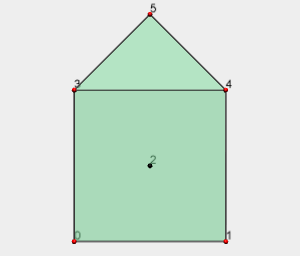

Note that the quadrilateral contains point 2 in its interior and that this point is colored black. This corresponds to the fact that the lifted point 2 lies above the convex hull of the lifted points 0,1,3 and 4. Therefore the maximal cell describing the quadrilateral does not contain the point 2. We may change the lifting function by giving point 2 height `0` as well:

    


In [2]:
$w = new Vector<Rational>([0,0,0,0,0,3]);
$S = new fan::SubdivisionOfPoints(POINTS=>$M,WEIGHTS=>$w);
print $S->MAXIMAL_CELLS;

{3 4 5}
{0 1 2 3 4}


    
    {0 1 2 3 4}
    {3 4 5}
    


In [4]:
$S->VISUAL;

<!--
polymake for andrew
Thu Mar 28 11:52:14 2019
pcom:S
-->


 
 
 pcom:S 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->



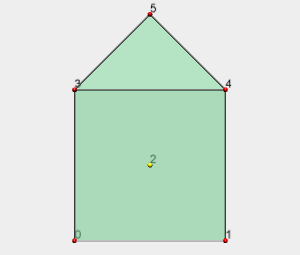

This new height function generates the same polyhedral complex, yet a different subdivision of the point set. Note that the maximal cell that describes the quadrilateral now contains the point 2, but it is not a vertex of that cell. This is the reason for the yellow coloring. This corresponds to the fact that its lifting lies in the convex hull of the lifted quadrilateral, whereat it is not a vertex of the lifted polytope. Changing the height of point 2 again to `-1` the subdivision should become a triangulation of the point set. 

    


In [3]:
$w = new Vector<Rational>([0,0,-1,0,0,3]);
$S = new fan::SubdivisionOfPoints(POINTS=>$M,WEIGHTS=>$w);
print $S->MAXIMAL_CELLS;

{0 1 2}
{0 2 3}
{2 3 4}
{3 4 5}
{1 2 4}


    
    {0 2 3}
    {0 1 2}
    {1 2 4}
    {2 3 4}
    {3 4 5}
    


In [4]:
$S->VISUAL;

<!--
polymake for andrew
Thu Apr 4 10:31:25 2019
pcom:S
-->


 
 
 pcom:S 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.



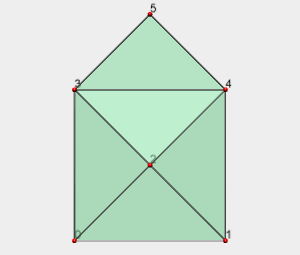

Indeed, the regular subdivision arising from this height function is a triangulation. Since in this case point 2 is a vertex of the subdivision it is colored red as well.

### Generic Weights

The weights `w` are called *generic* if they define a triangulation of the point set. If it is known in advance that the given weights are generic, then we can obtain the subdivison as a simplicial complex. If you want analyse your simplicial complex then you might want to use the polymake objects: `SimplicialComplex` or `GeometricSimplicialComplex`. The first one is a purely combinatoric version. The latter one has an embedding into a space via the property `COORDINATES`. Both objects live in the application `topaz`. The weights in the third example above are generic, so they define a simplicial complex.

    


In [5]:
$SC = new topaz::GeometricSimplicialComplex(COORDINATES=>$M, INPUT_FACES=>regular_subdivision($M,$w));


Note that `regular_subdivision($M,$w)` produces a list of the maximal cells in the regular subdivision of the point configuration `M` respecting the weights `w`.
Now we can ask for many other properties, e.g.

    


In [6]:
print $SC->F_VECTOR;

6 10 5

In [7]:
print $SC->H_VECTOR;

1 3 1 0

Check the properties of `SimplicialComplex` for more available properties.



### Non-generic Weights

If your weights are not generic or you are unsure, then you should create a `PolyhedralComplex`. Since every `SubdivisionOfPoints` Object has its underlying `PolyhedralComplex` as a property this can be done simply by:

    


In [12]:
$M = new Matrix<Rational>([[1,0,0,0],[1,0,1,0],[1,1,0,0],[1,1,1,0],[1,0,0,1],[1,1,0,1],[1,0,1,1],[1,1,1,1],[1,0,0,2]]);
$w = new Vector<Rational>([1,0,0,1,0,1,1,0,1]);
$S = new fan::SubdivisionOfPoints(POINTS=>$M,WEIGHTS=>$w);
$PC = $S->POLYHEDRAL_COMPLEX;
print $PC->MAXIMAL_POLYTOPES;

{0 1 2 4}
{1 2 4 7}
{1 4 6 7 8}
{2 4 5 7 8}
{1 2 3 7}


    
    {0 1 2 4}
    {2 4 5 7 8}
    {1 2 3 7}
    {1 2 4 7}
    {1 4 6 7 8}
    


As with an simplicial complex you can do some computation with it. For example:

    


In [13]:
print $PC->F_VECTOR;

9 20 17 5

In [14]:
print $PC->SIMPLICIAL;

false

In [11]:
$PC->VISUAL;

<!--
polymake for andrew
Thu Apr 4 10:32:51 2019
pcom:
-->


 
 
 pcom: 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


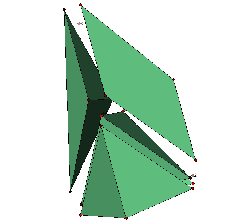

Check the interactive help to get more information.
For the image we have used the javaview option *Explode Group of Geometries* to make the cells of the subdivision visible. 

### Tropical Plücker Vectors and Matroid Decompositions of Hypersimplices

A *tropical Plücker vector* (which is a special lifting function on the vertices of the *(d,n)*-hypersimplex induces a particularly interesting kind of regular subdivision.  The example below is for *d=2* and *n=4*.
 

    


In [15]:
$p=new Vector<Rational>([1,0,0,0,0,0]);
$msd=regular_subdivision(hypersimplex(2,4)->VERTICES,$p);



Each cell of this subdivision is a *matroid polytope*, that is, the convex hull of characteristic vectors of the bases of some matroid on *n* elements of rank *d*.  The vertices of the hypersimplices happen to be listed in lexicographical ordering.  With this extra knowledge we can cook up suitable labels for pretty-printing the maximal cells. 

    


In [16]:
print rows_labeled($msd,undef,["12","13","14","23","24","34"]);

0:13 14 23 24 34
1:12 13 14 23 24



In this case the *(2,4)*-hypersimplex (a.k.a. the regular octahedron) is split into two egyptian pyramids.

## Secondary cone and regularity of subdivisions

The set of all the weight vectors which induce the same regular subdivision form a convex cone. In this section we will learn how to compute that cone with polymake and even how we can check whether a given subdivision is regular or not.

### Secondary Cone of a Regular Subdivision

Let us look at the following regular subdivision (using homogeneous coordinates):

    


In [17]:
$points = new Matrix([[1,2,0],[1,0,2],[1,-2,0],[1,0,-2],[1,1,0],[1,0,1],[1,-1,0],[1,0,-1]]);
$cells = new Array<Set<Int>>([[0,1,4,5],[0,3,4,7],[2,3,6,7],[1,2,5,6],[4,5,6,7]]);
$S = new fan::SubdivisionOfPoints(POINTS=>$points, MAXIMAL_CELLS=>$cells);


we can visualize the subdivision with the following command:

    


In [18]:
$S->VISUAL;

<!--
polymake for andrew
Thu Apr 4 10:44:37 2019
pcom:S
-->


 
 
 pcom:S 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


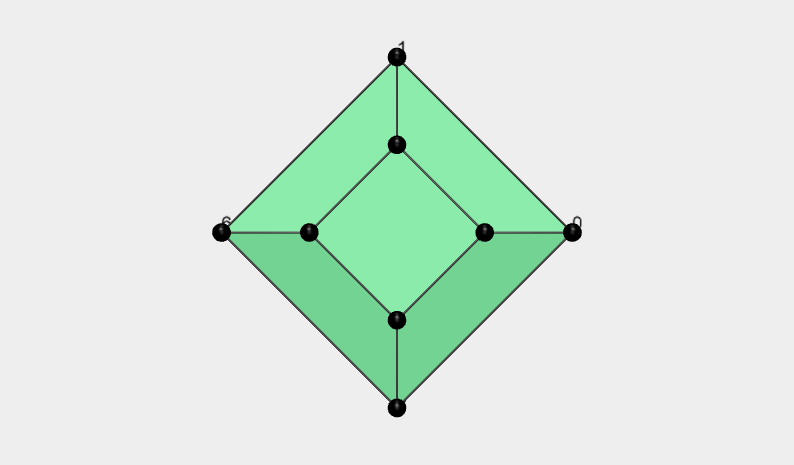

As one can see from the picture this subdivision should be regular, since we can easily find a weight vector which induces this subdivision. Just lift all the points in the inner square to 0 and the points on the outer square to 1. But now we want to take a look at all vectors which induce this subdivision. This can be achieved by using the method `secondary_cone`.

    


In [19]:
$sc = $S->secondary_cone();
print $sc->DIM;

4

In [20]:
print $sc->RAYS;

1 1 1 1 0 0 0 0


In [21]:
print $sc->LINEALITY_SPACE;

3/2 3/2 -1/2 -1/2 1 1 0 0
-13/14 15/14 23/14 -5/14 -2/7 5/7 1 0
5/9 -1/3 5/9 13/9 5/9 1/9 5/9 1


We see that this cone is 4-dimensional with a 3-dimensional lineality space. Every vector of the **interior** of that cone induces weights that produces the same regular subdivision. The vectors on the boundary give rise to a coarsening. As you see by looking at the coordinates, we do not need to lift the inner square to 0, there are also weight vectors which lift them in a different fashion but still produce the same subdivision.

With the options `lift_to_zero` or `lift_face_to_zero` one can specify points or a face which must be lifted to zero. Let us see what happens if we force polymake to only allow weights that lift the inner square to zero. As we see from our input, the face which describes the inner square is the fifth one (but since polymake starts counting at zero, it has number 4).

    


In [22]:
$sc_fixed = $S->secondary_cone(lift_face_to_zero=>4);

In [23]:
print $sc_fixed->DIM;

1

In [24]:
print $sc_fixed->RAYS;

1 1 1 1 0 0 0 0


In [25]:
print $sc_fixed->LINEALITY_SPACE;

Now you see that the lineality space of that cone is gone. The only way to lift our points now is by raising all points on the outer square to the same height which should be greater than 0.

### Regularity of Subdivisions

You might run into the situation where you want to check whether a subdivision is regular or not. Don't worry, polymake comes to rescue along with it's side-kick the `is_regular` function. The function takes the same input as the `secondary_cone` function. The output is a pair of a boolean and a vector. The boolean tells you whether or not the subdivision is regular and the vector is a weight vector which induces your subdivision. Let us check if our subdivision of the example above is regular.

    


In [26]:
print is_regular($points, $cells);

1 <0 0 1 1 0 0 1/2 1/2>

In [27]:
$lambda = new Vector("0 0 1 1 0 0 1/2 1/2");

In [28]:
print regular_subdivision($points, $lambda);

{4 5 6 7}
{2 3 6 7}
{1 2 5 6}
{0 3 4 7}
{0 1 4 5}


As you can see polymake tells us that our subdivision is indeed regular. And the vector `0 0 1 1 0 0 1/2 1/2` produces the same subdivision we started with. Now let us see what happens if we use a subdivision which is not regular. We use the same points as above but different cells.

    


In [29]:
$nreg_cells = new Array<Set<Int>>([[0,1,5],[0,4,5],[0,3,4],[3,4,7],[2,3,7],[2,6,7],[1,2,6],[1,5,6],[4,5,6,7]]);
$nreg_pc = new fan::PolyhedralComplex(POINTS=>$points, INPUT_POLYTOPES=>$nreg_cells);
$nreg_pc->VISUAL;

<!--
polymake for andrew
Thu Apr 4 10:45:34 2019
pcom:nreg_pc
-->


 
 
 pcom:nreg_pc 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


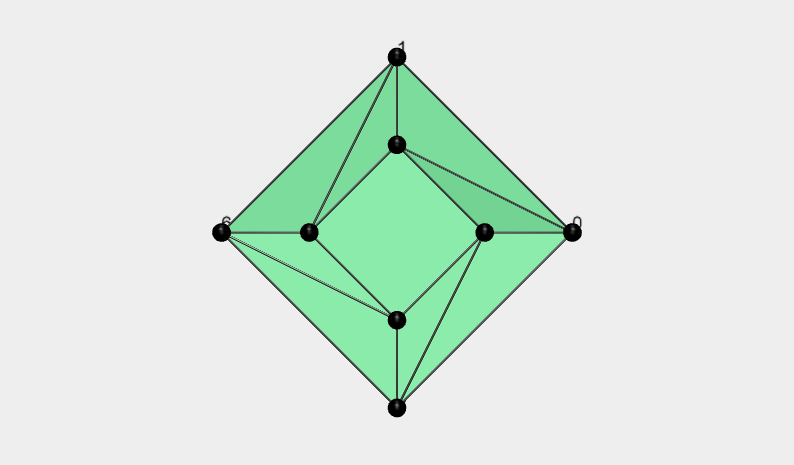

This is quite similar to the `mother of all examples` (See: "Triangulations" from DeLoera, Rambau and Santos). So with a similar argument we can see that this subdivision is indeed not regular. How does polymake feel about this?

    


In [30]:
print is_regular($points, $nreg_cells);

0 <>

Just as expected polymake tells us that the subdivision is not regular. But although there is no weight function which induces this particular subdivision we can still create a `SubdivisionOfPoints` object with the given cells. What happens if we ask for the secondary cone of that subdivision?

    


In [31]:
$nreg_sub = new fan::SubdivisionOfPoints(POINTS=>$points, MAXIMAL_CELLS=>$nreg_cells);
$nreg_sc = $nreg_sub->secondary_cone();
print $nreg_sc->DIM;

4

This might be weird at first. Although our subdivision is not regular (meaning there does not exist a secondary cone for that subdivision) the secondary cone seems to be 4 dimensional. Let us investigate.

    


In [32]:
print $nreg_sc->RAYS;

1 1 1 1 0 0 0 0


In [33]:
print $nreg_sc->LINEALITY_SPACE;

3/2 3/2 -1/2 -1/2 1 1 0 0
-13/14 15/14 23/14 -5/14 -2/7 5/7 1 0
5/9 -1/3 5/9 13/9 5/9 1/9 5/9 1


This looks familiar, doesn't it? We got the same secondary cone as we did in our first example. The reason for this is that the first example is the finest regular coarsening of our non regular subdivision. And this is exactly what we see here. In other words, the subdivision of our first example is the closest regular thing similar to our non regular subdivision and this is exactly what the `secondary_cone` function produces. If a subdivision is not regular it gives you the secondary cone of the next best regular subdivision.
